In [7]:
%matplotlib widget
import matplotlib.pyplot as plt

import sys
import os

sys.path.append('.')

from math import gcd
from functools import reduce

import pickle

import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.preprocessing import StandardScaler

from kan import *

torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Config parameters

In [8]:
data_dir = os.path.join('.', 'data')

# KAN model properties
input_size = 5000
hidden_layers = 3
output_size = 5000
epochs = 100
learning_rate = 0.001
train_samples = 5000

checkpoint directory created: ./model
saving model version 0.0


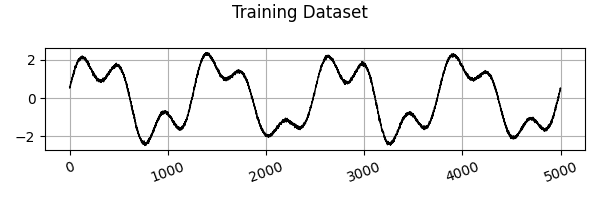

In [9]:
# Create a KAN model
model = MultKAN(
    ckpt_path="./model",
    width=[input_size, hidden_layers, output_size], 
    grid=5, 
    k=3, 
    seed=42, 
    device=device, 
    noise_scale=1
)

# Load train and test dataset
df_train = pd.read_pickle(os.path.join(data_dir, "train_data.pkl"))
df_test = pd.read_pickle(os.path.join(data_dir, "test_data.pkl"))

# Graph the train dataset
fig, ax = plt.subplots(1, 1, sharex='col', figsize=(6, 2))
fig.suptitle('Training Dataset')
ax.plot(df_train.iloc[1,:], color='black', linewidth=1)
ax.grid(True)

plt.xticks(rotation=20)
fig.tight_layout()

train_tmp = []
test_tmp = []
for col in df_train.columns: 
    train_tmp.append(df_train[col])
    test_tmp.append(df_test[col])
dataset = {}
dataset["train_input"] = torch.transpose(torch.Tensor(train_tmp), 0, 1)
dataset["train_label"] = torch.transpose(torch.Tensor(train_tmp), 0, 1)
dataset["test_input"] = torch.transpose(torch.Tensor(test_tmp), 0, 1)
dataset["test_label"] = torch.transpose(torch.Tensor(test_tmp), 0, 1)

In [10]:
# plot KAN at initialization
model(dataset['train_input']);
#model.plot() # Disabled it takes too much time

In [11]:
# train the model
model.fit(dataset, opt="LBFGS", steps=epochs);

| train_loss: 8.82e-10 | test_loss: 6.82e+00 | reg: 5.26e+04 | : 100%|█| 100/100 [00:53<00:00,  1.85


saving model version 0.1


In [12]:
model.fit(dataset, opt="LBFGS", steps=epochs);
#model.plot() # Disabled it takes too much time

| train_loss: 1.98e-10 | test_loss: 6.82e+00 | reg: 5.26e+04 | : 100%|█| 100/100 [00:15<00:00,  6.37


saving model version 0.2
